# BUSINESS UNDERSTANDING

You can’t build a future on a dry well, yet millions of Tanzanians are forced to try. Millions of Tanzanians wake up each day unsure if the nearest well will provide safe, reliable water. Despite significant investments in rural water supply, wells; the backbone of access for much of the country, remain fragile infrastructure.

In 2025, Tanzania’s population is estimated at 70.5 million, with nearly one in three people (24–25 million) depending on wells and boreholes as their primary source of drinking water. These wells represent not just infrastructure, but lifelines for health, livelihoods, and dignity. Unfortunately, many fail within just a few years due to poor construction, lack of spare parts, environmental stress, or limited maintenance capacity.

The consequences are devastating:

* Health risks: Communities without functioning wells often turn to unsafe surface water, exposing themselves to waterborne diseases like cholera and dysentery.

* Economic loss: When wells fail, households spend time and money securing alternatives, reducing productivity and straining already limited resources.

* Education & gender equity: The burden of fetching water falls disproportionately on women and children, pulling girls out of classrooms and limiting women’s participation in economic activity.

* Wasted investment: Donor funds and government budgets spent on drilling wells are wasted if infrastructure collapses prematurely.

This challenge is not unique to Tanzania. It echoes across sub-Saharan Africa, but the scale here is stark. The Water Sector Development Program (WSDP), aligned with Sustainable Development Goal 6 (Clean Water and Sanitation), recognizes that simply drilling more wells is not enough. Sustainability is the frontier: keeping existing water points functional is as critical as expanding new access.

The guiding question becomes:

**Can we predict the operational status of a well, functional, needs repair, or non-functional, before communities are left dry?**

Framing this as a data science problem unlocks powerful opportunities:

* Proactive maintenance: Predictive insights can direct scarce technical teams to wells most at risk, preventing breakdowns before they occur.

* Smarter investments: Policymakers and NGOs can channel resources into areas where the risk of failure is highest, stretching limited budgets further.

* Community resilience: Reduced downtime means families, schools, and clinics can count on reliable access to water, improving overall well-being.

* Accountability & transparency: Data-driven decisions strengthen trust between communities, government, and development partners.

This project is more than a technical exercise. It is about ensuring that the promise of safe water lasts longer than the photo-op of a ribbon-cutting ceremony. It is about shifting the narrative from building wells to building resilience. If successful, predictive modeling can turn reactive repairs into proactive strategies, and help ensure that every drop counts toward Tanzania’s development journey.

## PROBLEM STATEMENT

Despite heavy investments in rural water infrastructure, a significant share of Tanzania’s wells are non-functional or in disrepair at any given time. This creates severe health, economic, and social burdens for the millions of people who rely on them. Traditional monitoring methods are often reactive, costly, and slow, leaving communities without reliable water for extended periods.

The challenge is to develop a predictive model that can classify the operational status of wells, functional, functional but needs repair, or non-functional. By identifying at-risk wells in advance, decision-makers can prioritize maintenance, reduce downtime, and improve the sustainability of rural water access.

This problem is fundamentally a multi-class classification task, where the goal is to use historical and environmental data about wells (e.g., location, construction type, usage, and water quality) to predict their current functionality.

## OBJECTIVES

### General Objective

To develop a data-driven framework that predicts the functionality of water wells in Tanzania, enabling proactive maintenance and sustainable water access for communities.

### Specific Objectives

* Identify the key drivers of well failures by analyzing historical, geographic, and infrastructural data.

* Build and evaluate predictive models to classify wells into three categories: functional, functional but needs repair, and non-functional.

* Generate actionable insights and visualizations that help policymakers and NGOs prioritize interventions.

* Assess the relative importance of features (e.g construction type, location, usage) to guide future data collection and infrastructure planning.

* Provide a scalable, reproducible approach that can be adapted to other regions facing similar water access challenges.

## SUCCESS METRICS

### Model Performance

* Achieve at least 75% overall accuracy in classifying well status (functional, needs repair, non-functional).

* Attain ≥75% recall on non-functional wells, ensuring at-risk communities are not overlooked.

* Reach balanced precision-recall trade-offs across all classes to avoid bias toward majority classes.

### Interpretability and Insights

* Deliver clear, interpretable feature importance rankings that explain drivers of well failure.

* Provide easy-to-understand visualizations and dashboards that policymakers, NGOs, and engineers can act upon without technical expertise.

### Practical Impact

* Enable prioritization of maintenance interventions, reducing downtime of critical wells.

* Ensure the framework is scalable and reproducible, so it can be applied to other regions or expanded with new data sources.

# DATA UNDERSTANDING

This project uses the Tanzania water wells dataset, compiled by **Taarifa** in collaboration with the **Tanzanian Ministry of Water**, and made public through the [DrivenData “Pump It Up” competition](https://www.drivendata.org/competitions/7/pump-it-up-data-mining-the-water-table/data/). It provides detailed records of rural water points across Tanzania, making it a rich source for understanding well functionality. 

The dataset is split into three parts:  

- **Training set values.csv:** Feature data for training.  
- **Training set labels.csv:** Target labels linked to the training set.  
- **Test set values.csv:** Feature data for the test set.

Since our ultimate goal is predictive modeling, we treat these datasets differently:  

- Training data: Merged (values and labels) and used for a full exploratory deep dive. This is where we study feature distributions, relationships, and the drivers of well failure.  
- Test data: Kept separate. Only used for sanity checks (consistency of categories, ranges, and missing values) and final model evaluation. No target-based exploration is possible here. 

At this stage, we’re focusing on:  

- Dataset overview: Rows, columns, data types, and overall structure.  
- Data quality check: Missing values, outliers, and duplicates that could distort analysis.  
- Feature exploration (train only): Distributions of numeric and categorical features.  
- Target variable deep dive (train only): Breakdown of the three classes (functional, needs repair, non-functional), checking for balance or skew.  
- Initial insights: Early signals such as pump types that fail more often, or regions with higher breakdown rates.

## TRAINING DATASETS

### DATASET OVERVIEW

We first import all the necessary libraries.

In [746]:
# Utilities
import warnings
warnings.filterwarnings('ignore')

# Mathematical Operations
import numpy as np

# Data Manipulation
import pandas as pd

# Visualization
import matplotlib.pyplot as plt
plt.style.use('seaborn-v0_8-whitegrid')
import seaborn as sns

# Statistical Tests
from scipy.stats import chi2_contingency

Then load the datasets.

In [747]:
# Training values (features)
train_values_df = pd.read_csv("Data\Training set values.csv")

# Training labels (targets)
train_labels_df = pd.read_csv("Data\Training set labels.csv")

# Test values (features only)
test_df = pd.read_csv("Data\Test set values.csv")

Since the training labels (Training set labels) file contains only the target variable, we’ll merge it with the training features (Training set values) file using the shared 'id' column. This gives us a single, consolidated dataset that’s ready for full exploratory data analysis (EDA).  

In [748]:
# Merge training values and labels
train_df = train_values_df.merge(train_labels_df, on = 'id')

Next, we will check the overall structure for the new training dataset.

In [749]:
# Load entire dataset
train_df

,id,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,...,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group,status_group
0,69572,6000.0,2011-03-14,Roman,1390,Roman,34.938093,-9.856322,none,0,...,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe,functional
1,8776,0.0,2013-03-06,Grumeti,1399,GRUMETI,34.698766,-2.147466,Zahanati,0,...,soft,good,insufficient,insufficient,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe,functional
2,34310,25.0,2013-02-25,Lottery Club,686,World vision,37.460664,-3.821329,Kwa Mahundi,0,...,soft,good,enough,enough,dam,dam,surface,communal standpipe multiple,communal standpipe,functional
3,67743,0.0,2013-01-28,Unicef,263,UNICEF,38.486161,-11.155298,Zahanati Ya Nanyumbu,0,...,soft,good,dry,dry,machine dbh,borehole,groundwater,communal standpipe multiple,communal standpipe,non functional
4,19728,0.0,2011-07-13,Action In A,0,Artisan,31.130847,-1.825359,Shuleni,0,...,soft,good,seasonal,seasonal,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe,functional
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59395,60739,10.0,2013-05-03,Germany Republi,1210,CES,37.169807,-3.253847,Area Three Namba 27,0,...,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe,functional
59396,27263,4700.0,2011-05-07,Cefa-njombe,1212,Cefa,35.249991,-9.070629,Kwa Yahona Kuvala,0,...,soft,good,enough,enough,river,river/lake,surface,communal standpipe,communal standpipe,functional
59397,37057,0.0,2011-04-11,NaN,0,NaN,34.017087,-8.750434,Mashine,0,...,fluoride,fluoride,enough,enough,machine dbh,borehole,groundwater,hand pump,hand pump,functional
59398,31282,0.0,2011-03-08,Malec,0,Musa,35.861315,-6.378573,Mshoro,0,...,soft,good,insufficient,insufficient,shallow well,shallow well,groundwater,hand pump,hand pump,functional


In [750]:
# Check the shape of the dataset
print(f"The training dataset has {train_df.shape[0]} rows and {train_df.shape[1]} columns.")

The training dataset has 59400 rows and 41 columns.


*Observation:* This is a sizable dataset; over **59,000 rows** across **41 columns**. Plenty of information to work with!  

Next, let’s take a look at the column names to see how clean and intuitive they are.  

In [751]:
# Check column names
train_df.columns

Index(['id', 'amount_tsh', 'date_recorded', 'funder', 'gps_height',
       'installer', 'longitude', 'latitude', 'wpt_name', 'num_private',
       'basin', 'subvillage', 'region', 'region_code', 'district_code', 'lga',
       'ward', 'population', 'public_meeting', 'recorded_by',
       'scheme_management', 'scheme_name', 'permit', 'construction_year',
       'extraction_type', 'extraction_type_group', 'extraction_type_class',
       'management', 'management_group', 'payment', 'payment_type',
       'water_quality', 'quality_group', 'quantity', 'quantity_group',
       'source', 'source_type', 'source_class', 'waterpoint_type',
       'waterpoint_type_group', 'status_group'],
      dtype='object')

*Observation:* The column names are already well-structured, no typos, no trailing spaces, no random casing issues.  

1. Identification & Tracking

id: Unique identifier, no analytical value beyond indexing.

recorded_by: Likely constant (data collector), minimal predictive value.

2. Geospatial Features

longitude, latitude, gps_height: Core spatial markers. Useful for mapping, clustering, and environmental correlations. Note: gps_height often contains 0 or missing values.

region, region_code, district_code, lga, ward, subvillage: Hierarchical administrative features. Redundancy possible, but valuable for aggregation and regional analysis.

3. Socioeconomic & Administrative

funder, installer: High-cardinality, messy (spelling/duplicates). Requires cleaning and grouping (e.g top contributors vs. “others”).

scheme_name, scheme_management, management, management_group: Indicate ownership/operation models. Strong predictors of long-term sustainability.

4. Technical Infrastructure

extraction_type, extraction_type_group, extraction_type_class: Hierarchical categories of water extraction methods.

waterpoint_type, waterpoint_type_group: Define delivery structure (standpipe, well, etc.).

source, source_type, source_class: Capture the origin of water (spring, borehole, river).

5. Usage & Accessibility

population → Number of people served.

num_private: Mostly zeros, limited analytical utility.

public_meeting, permit: Boolean/categorical variables. Missing values are common but may reflect governance/community involvement.

payment, payment_type: Indicate cost recovery models, linked to sustainability.

6. Water Quality & Quantity

water_quality, quality_group: Overlapping; may require consolidation.

quantity, quantity_group: Flow availability.

7. Temporal

date_recorded: Record date, not construction date. Useful for cohort or data freshness analysis.

construction_year: Frequently unreliable (0 as default missing). Needs cleaning/imputation.

8. Target Variable

status_group: Core outcome variable (functional, functional needs repair, non-functional). Central to classification tasks.

Next, we’ll move into metadata inspection. Metadata is essentially *data about the data*. It helps us understand the overall structure and quality of the dataset. This step lets us:  
- Spot null distributions.  
- Distinguish between numerical and categorical features.  
- Get an early sense of how tidy (or messy) things really are. 

Afterwards, we will separate the categorical and numerical features.

Let’s dive in.  

In [752]:
# Get metadata
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59400 entries, 0 to 59399
Data columns (total 41 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     59400 non-null  int64  
 1   amount_tsh             59400 non-null  float64
 2   date_recorded          59400 non-null  object 
 3   funder                 55763 non-null  object 
 4   gps_height             59400 non-null  int64  
 5   installer              55745 non-null  object 
 6   longitude              59400 non-null  float64
 7   latitude               59400 non-null  float64
 8   wpt_name               59398 non-null  object 
 9   num_private            59400 non-null  int64  
 10  basin                  59400 non-null  object 
 11  subvillage             59029 non-null  object 
 12  region                 59400 non-null  object 
 13  region_code            59400 non-null  int64  
 14  district_code          59400 non-null  int64  
 15  lg

### FEATURE EXPLORATION

In [753]:
# Get numerical columns
train_df.select_dtypes(include = 'number').columns.tolist()

['id',
 'amount_tsh',
 'gps_height',
 'longitude',
 'latitude',
 'num_private',
 'region_code',
 'district_code',
 'population',
 'construction_year']

*Observation:* No obvious type mismatches here. The features that should be numeric are indeed stored as numeric.  

To confirm, let’s dig deeper by checking the summary statistics. This not only validates the data types but also gives us a first glimpse into the distribution and range of these features.  

In [754]:
# Get descriptive statistics for numerical columns
train_df.describe().T

,count,mean,std,min,25%,50%,75%,max
id,59400.0,37115.131768,21453.128371,0.00000,18519.750000,37061.500000,55656.500000,7.424700e+04
amount_tsh,59400.0,317.650385,2997.574558,0.00000,0.000000,0.000000,20.000000,3.500000e+05
gps_height,59400.0,668.297239,693.116350,-90.00000,0.000000,369.000000,1319.250000,2.770000e+03
longitude,59400.0,34.077427,6.567432,0.00000,33.090347,34.908743,37.178387,4.034519e+01
latitude,59400.0,-5.706033,2.946019,-11.64944,-8.540621,-5.021597,-3.326156,-2.000000e-08
num_private,59400.0,0.474141,12.236230,0.00000,0.000000,0.000000,0.000000,1.776000e+03
region_code,59400.0,15.297003,17.587406,1.00000,5.000000,12.000000,17.000000,9.900000e+01
district_code,59400.0,5.629747,9.633649,0.00000,2.000000,3.000000,5.000000,8.000000e+01
population,59400.0,179.909983,471.482176,0.00000,0.000000,25.000000,215.000000,3.050000e+04
construction_year,59400.0,1300.652475,951.620547,0.00000,0.000000,1986.000000,2004.000000,2.013000e+03


Let's visualise this so it's clearer.

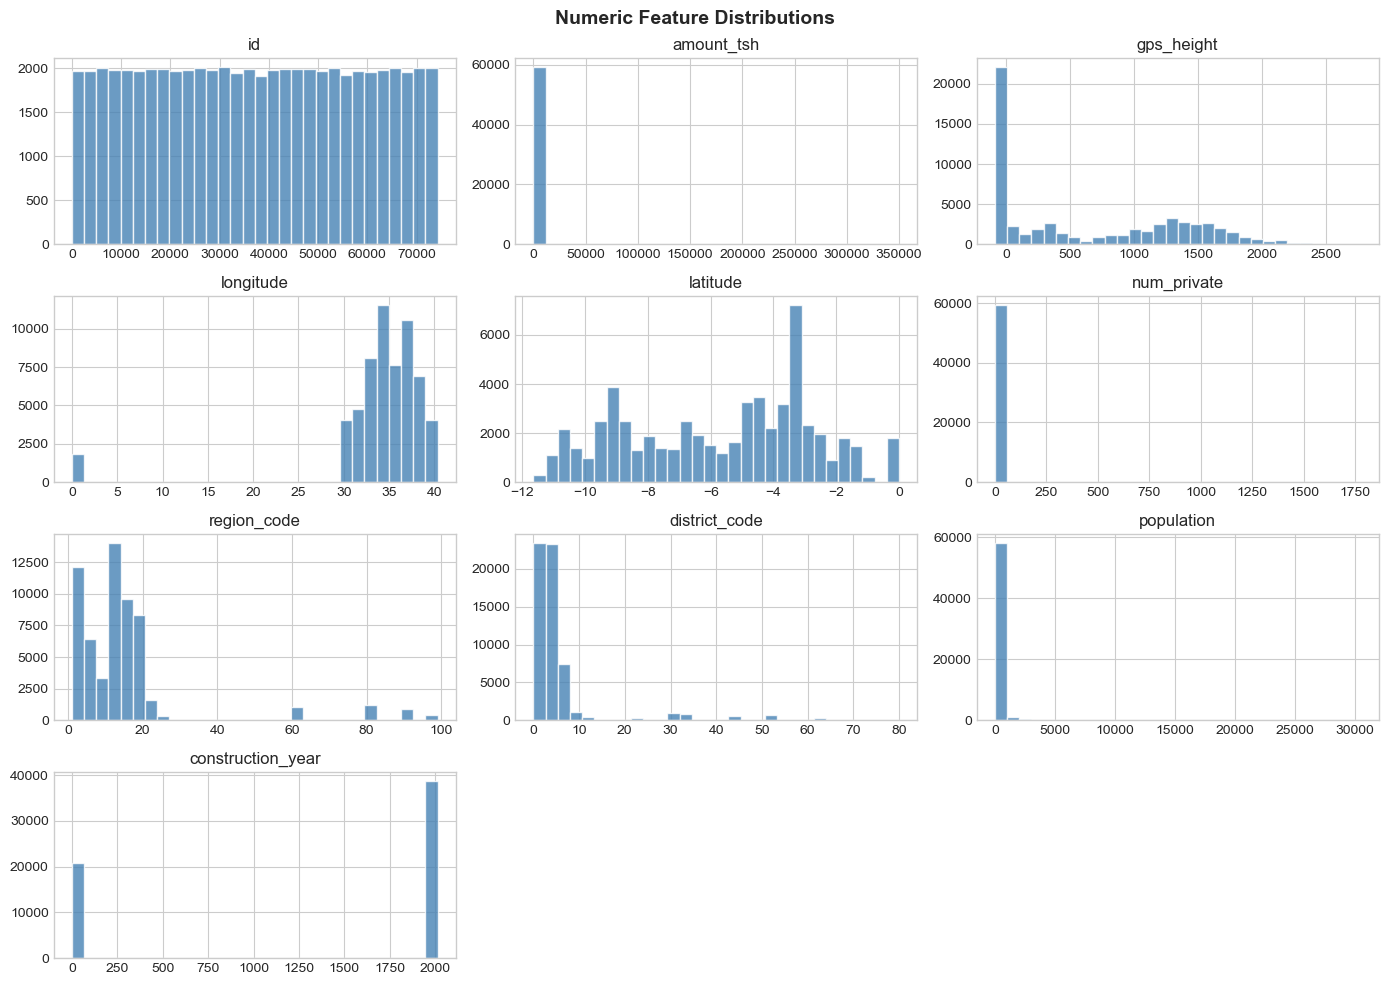

In [755]:
# Histograms for numeric features
train_df.hist(
    figsize = (14, 10), 
    bins = 30, 
    edgecolor = 'white',
    color = 'steelblue',
    alpha = 0.8
)

plt.suptitle('Numeric Feature Distributions', fontsize = 14, fontweight = 'bold')
plt.tight_layout()
plt.show()

See features that have outliers. We will use boxplots for this.

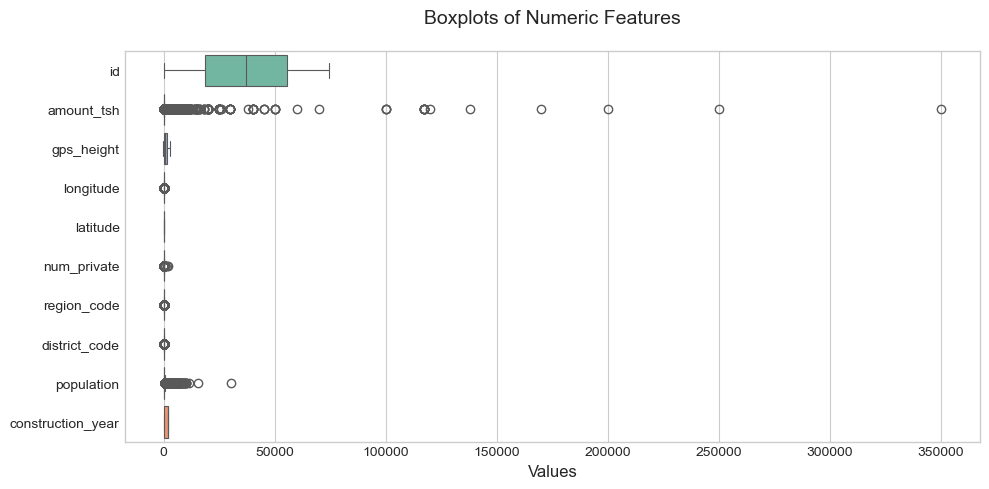

In [756]:
# Save numerical features into a variable
numeric_cols = train_df.select_dtypes(include = np.number).columns

# Plot boxplots
plt.figure(figsize = (10, 5))
sns.boxplot(
    data = train_df[numeric_cols], 
    orient = 'h',
    palette = 'Set2',
    linewidth = 0.8
)

plt.title('Boxplots of Numeric Features', fontsize = 14, pad = 20)
plt.xlabel('Values', fontsize = 12)
plt.tight_layout()
plt.show()

*Observation:* 

A few things jump out immediately:  
- **gps_height** has negative values (wells below sea level? Likely data entry errors).  
- **longitude** and **latitude** include zeros, which don’t make geographical sense for Tanzania. Could they be placeholders for missing data?  
- **amount_tsh** is heavily skewed, with most values at zero but an extreme max of 350,000. That screams outliers, albeit they could be genuine.  
- **num_private** is basically all zeros, with a wild outlier at 1,776. Likely a useless feature. Subject for further scrutiny. 
- **construction_year** has suspicious zeros, even though we know wells can’t be built in year 0.  
- **population** is wildly imbalanced: many zeros, but a max of 30,500, suggesting poor recording or aggregation issues.  

In short: while the dataset is large and rich, it carries its fair share of quirks that need cleaning before any serious modeling. 

Now let's shift our focus to the categorical variables.

In [757]:
# Get categorical columns
train_df.select_dtypes(include = 'object').columns.tolist()

['date_recorded',
 'funder',
 'installer',
 'wpt_name',
 'basin',
 'subvillage',
 'region',
 'lga',
 'ward',
 'public_meeting',
 'recorded_by',
 'scheme_management',
 'scheme_name',
 'permit',
 'extraction_type',
 'extraction_type_group',
 'extraction_type_class',
 'management',
 'management_group',
 'payment',
 'payment_type',
 'water_quality',
 'quality_group',
 'quantity',
 'quantity_group',
 'source',
 'source_type',
 'source_class',
 'waterpoint_type',
 'waterpoint_type_group',
 'status_group']

*Observation:* Looks like our data is mostly categorical. We will do the same as we did with numerical features and check summary statistics

In [758]:
# Get descriptive statistics for categorical columns
train_df.describe(include = 'object')

,date_recorded,funder,installer,wpt_name,basin,subvillage,region,lga,ward,public_meeting,...,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group,status_group
count,59400,55763,55745,59398,59400,59029,59400,59400,59400,56066,...,59400,59400,59400,59400,59400,59400,59400,59400,59400,59400
unique,356,1896,2145,37399,9,19287,21,125,2092,2,...,8,6,5,5,10,7,3,7,6,3
top,2011-03-15,Government Of Tanzania,DWE,none,Lake Victoria,Madukani,Iringa,Njombe,Igosi,True,...,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe,functional
freq,572,9084,17402,3563,10248,508,5294,2503,307,51011,...,50818,50818,33186,33186,17021,17021,45794,28522,34625,32259


Because of their large number, we will save the visualisations for the data cleaning phase.

*Observation:* 

The categorical landscape is just as messy as the numeric side:
- Target distribution: status_group is imbalanced; functional dominates (32,259), followed by non-functional (24,660), with needs repair trailing (3,481). That skew will need attention during modeling.    
- High cardinality: Features like 'funder' (1,896 unique), 'installer' (2,145 unique), and 'wpt_name' (37,399 unique!) are way too granular. Many of these are variations of the same entity (e.g “Government of Tanzania” vs “Govt Tanzania”). These will need collapsing or encoding strategies.  
- Dominant modes: Some variables are massively imbalanced; 'public_meeting' is “True” for 51,011 out of 56,066 records, and 'payment_type = never pay' accounts for 25,348 records.  
- Geographic hierarchy: 'region', 'lga', and 'ward' provide location granularity at different levels. Useful, but they’ll need careful handling to avoid multicollinearity.  
- Waterpoint design: 'waterpoint_type' and 'waterpoint_type_group' overlap heavily. Likely redundant features.  
- Suspicious entries: The most common 'wpt_name' is literally “none” (3,563 times), which isn’t very informative. Similar issues exist for subvillage names.  

Overall: categorical features offer valuable signals but are cluttered with inconsistencies, redundancies, and heavy skew. Cleaning and grouping will be critical here.  

Because of their large number, we will save the visualisations for the cleaning and EDA (Exploratory Data Analysis) phase.

Next we check for data completeness and sanity. This is all about checking for missing values distribution and duplicated values.

### DATA QUALITY CHECK

In [759]:
# Check for duplicates
print("Duplicate:", train_df.duplicated().sum())

# Check for missing values and missingness percentage
# Because they are many features, we will only check for missingness above 0%
missing_values = train_df.isnull().sum()
missing_percentage = (missing_values / len(train_df)) * 100
missing_info = pd.DataFrame({'Missing Values': missing_values, 'Percentage': missing_percentage})
print("\nMissing values and percentage:\n", missing_info[missing_info['Percentage'] > 0.000000])

Duplicate: 0

Missing values and percentage:
                    Missing Values  Percentage
funder                       3637    6.122896
installer                    3655    6.153199
wpt_name                        2    0.003367
subvillage                    371    0.624579
public_meeting               3334    5.612795
scheme_management            3878    6.528620
scheme_name                 28810   48.501684
permit                       3056    5.144781


*Observation:*

Duplicates aren’t an issue (zero found), but missing values definitely are:  
- Moderate gaps (5–6%) in 'funder', 'installer', 'public_meeting', 'scheme_management', and 'permit'. Manageable, but they’ll need imputation or categorical grouping.  
- Negligible gaps (<1%) in 'wpt_name' and 'subvillage', easy wins for cleanup.  
- Massive hole (49%) in 'scheme_name', making it essentially unusable in raw form. Either it gets dropped, or we engineer a high-level indicator (e.g “has_scheme_name” vs “no_scheme_name”).  

Overall, the dataset is mostly complete, but there are pockets of systematic missingness (especially around water management schemes) that hint at recording inconsistencies in the field.  

## TESTING DATASET

### DATASET OVERVIEW

Awesome! Now, let’s turn to the test dataset. Unlike the training data, we won’t merge this with labels. Doing so would be both invalid and a source of data leakage. 

However, it’s still important to **audit and clean the test set** to ensure it follows the same structure and quality standards as the training data. That way, when our model is deployed, it will be working with reliable and consistent inputs.  

In [760]:
# Load entire dataset
test_df

,id,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,...,payment_type,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group
0,50785,0.0,2013-02-04,Dmdd,1996,DMDD,35.290799,-4.059696,Dinamu Secondary School,0,...,never pay,soft,good,seasonal,seasonal,rainwater harvesting,rainwater harvesting,surface,other,other
1,51630,0.0,2013-02-04,Government Of Tanzania,1569,DWE,36.656709,-3.309214,Kimnyak,0,...,never pay,soft,good,insufficient,insufficient,spring,spring,groundwater,communal standpipe,communal standpipe
2,17168,0.0,2013-02-01,NaN,1567,NaN,34.767863,-5.004344,Puma Secondary,0,...,never pay,soft,good,insufficient,insufficient,rainwater harvesting,rainwater harvesting,surface,other,other
3,45559,0.0,2013-01-22,Finn Water,267,FINN WATER,38.058046,-9.418672,Kwa Mzee Pange,0,...,unknown,soft,good,dry,dry,shallow well,shallow well,groundwater,other,other
4,49871,500.0,2013-03-27,Bruder,1260,BRUDER,35.006123,-10.950412,Kwa Mzee Turuka,0,...,monthly,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14845,39307,0.0,2011-02-24,Danida,34,Da,38.852669,-6.582841,Kwambwezi,0,...,never pay,soft,good,enough,enough,river,river/lake,surface,communal standpipe,communal standpipe
14846,18990,1000.0,2011-03-21,Hiap,0,HIAP,37.451633,-5.350428,Bonde La Mkondoa,0,...,annually,salty,salty,insufficient,insufficient,shallow well,shallow well,groundwater,hand pump,hand pump
14847,28749,0.0,2013-03-04,NaN,1476,NaN,34.739804,-4.585587,Bwawani,0,...,never pay,soft,good,insufficient,insufficient,dam,dam,surface,communal standpipe,communal standpipe
14848,33492,0.0,2013-02-18,Germany,998,DWE,35.432732,-10.584159,Kwa John,0,...,never pay,soft,good,insufficient,insufficient,river,river/lake,surface,communal standpipe,communal standpipe


In [761]:
# Check the shape of the dataset
print(f"The testing dataset has {test_df.shape[0]} rows and {test_df.shape[1]} columns.")

The testing dataset has 14850 rows and 40 columns.


*Observation:* The test dataset is equally substantial, with over **14,000 rows** spanning **40 columns**. While it mirrors the training set in structure, it naturally lacks the target variable. This still gives us a rich feature space to validate and refine our preprocessing steps, ensuring consistency between training and testing pipelines.  

Next, let’s review the column names to check how clean, consistent, and intuitive they are.  

In [762]:
# Check column names
test_df.columns

Index(['id', 'amount_tsh', 'date_recorded', 'funder', 'gps_height',
       'installer', 'longitude', 'latitude', 'wpt_name', 'num_private',
       'basin', 'subvillage', 'region', 'region_code', 'district_code', 'lga',
       'ward', 'population', 'public_meeting', 'recorded_by',
       'scheme_management', 'scheme_name', 'permit', 'construction_year',
       'extraction_type', 'extraction_type_group', 'extraction_type_class',
       'management', 'management_group', 'payment', 'payment_type',
       'water_quality', 'quality_group', 'quantity', 'quantity_group',
       'source', 'source_type', 'source_class', 'waterpoint_type',
       'waterpoint_type_group'],
      dtype='object')

*Observation:* The test dataset also comes with well-structured column names; neat, intuitive, and free from the usual suspects like typos, stray spaces, or inconsistent casing.   

Our next step is a metadata check. From there, we’ll classify the features into numerical and categorical groups to set the stage for cleaning.  

In [763]:
# Get metadata
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14850 entries, 0 to 14849
Data columns (total 40 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     14850 non-null  int64  
 1   amount_tsh             14850 non-null  float64
 2   date_recorded          14850 non-null  object 
 3   funder                 13980 non-null  object 
 4   gps_height             14850 non-null  int64  
 5   installer              13973 non-null  object 
 6   longitude              14850 non-null  float64
 7   latitude               14850 non-null  float64
 8   wpt_name               14850 non-null  object 
 9   num_private            14850 non-null  int64  
 10  basin                  14850 non-null  object 
 11  subvillage             14751 non-null  object 
 12  region                 14850 non-null  object 
 13  region_code            14850 non-null  int64  
 14  district_code          14850 non-null  int64  
 15  lg

### FEATURE EXPLORATION

In [764]:
# Get numerical columns
test_df.select_dtypes(include = 'number').columns.tolist()

['id',
 'amount_tsh',
 'gps_height',
 'longitude',
 'latitude',
 'num_private',
 'region_code',
 'district_code',
 'population',
 'construction_year']

*Observation:* No apparent type mismatches here either. The numeric features in the test dataset are stored correctly as numeric.  

As with the training set, we’ll validate this by reviewing the summary statistics. This step not only reconfirms the integrity of the data types but also offers a quick snapshot of the feature distributions and ranges.  

Reassuringly, the numerical columns have been kept consistent between the training and test datasets, which makes preprocessing and modeling much smoother.  

In [765]:
# Get descriptive statistics for numerical columns
test_df.describe().T

,count,mean,std,min,25%,50%,75%,max
id,14850.0,37161.972929,21359.364833,10.000000,18727.000000,37361.500000,55799.750000,7.424900e+04
amount_tsh,14850.0,322.826983,2510.968644,0.000000,0.000000,0.000000,25.000000,2.000000e+05
gps_height,14850.0,655.147609,691.261185,-57.000000,0.000000,344.000000,1308.000000,2.777000e+03
longitude,14850.0,34.061605,6.593034,0.000000,33.069455,34.901215,37.196594,4.032502e+01
latitude,14850.0,-5.684724,2.940803,-11.564592,-8.443970,-5.049750,-3.320594,-2.000000e-08
num_private,14850.0,0.415084,8.167910,0.000000,0.000000,0.000000,0.000000,6.690000e+02
region_code,14850.0,15.139057,17.191329,1.000000,5.000000,12.000000,17.000000,9.900000e+01
district_code,14850.0,5.626397,9.673842,0.000000,2.000000,3.000000,5.000000,8.000000e+01
population,14850.0,184.114209,469.499332,0.000000,0.000000,20.000000,220.000000,1.146900e+04
construction_year,14850.0,1289.708350,955.241087,0.000000,0.000000,1986.000000,2004.000000,2.013000e+03


Visualise this distribution

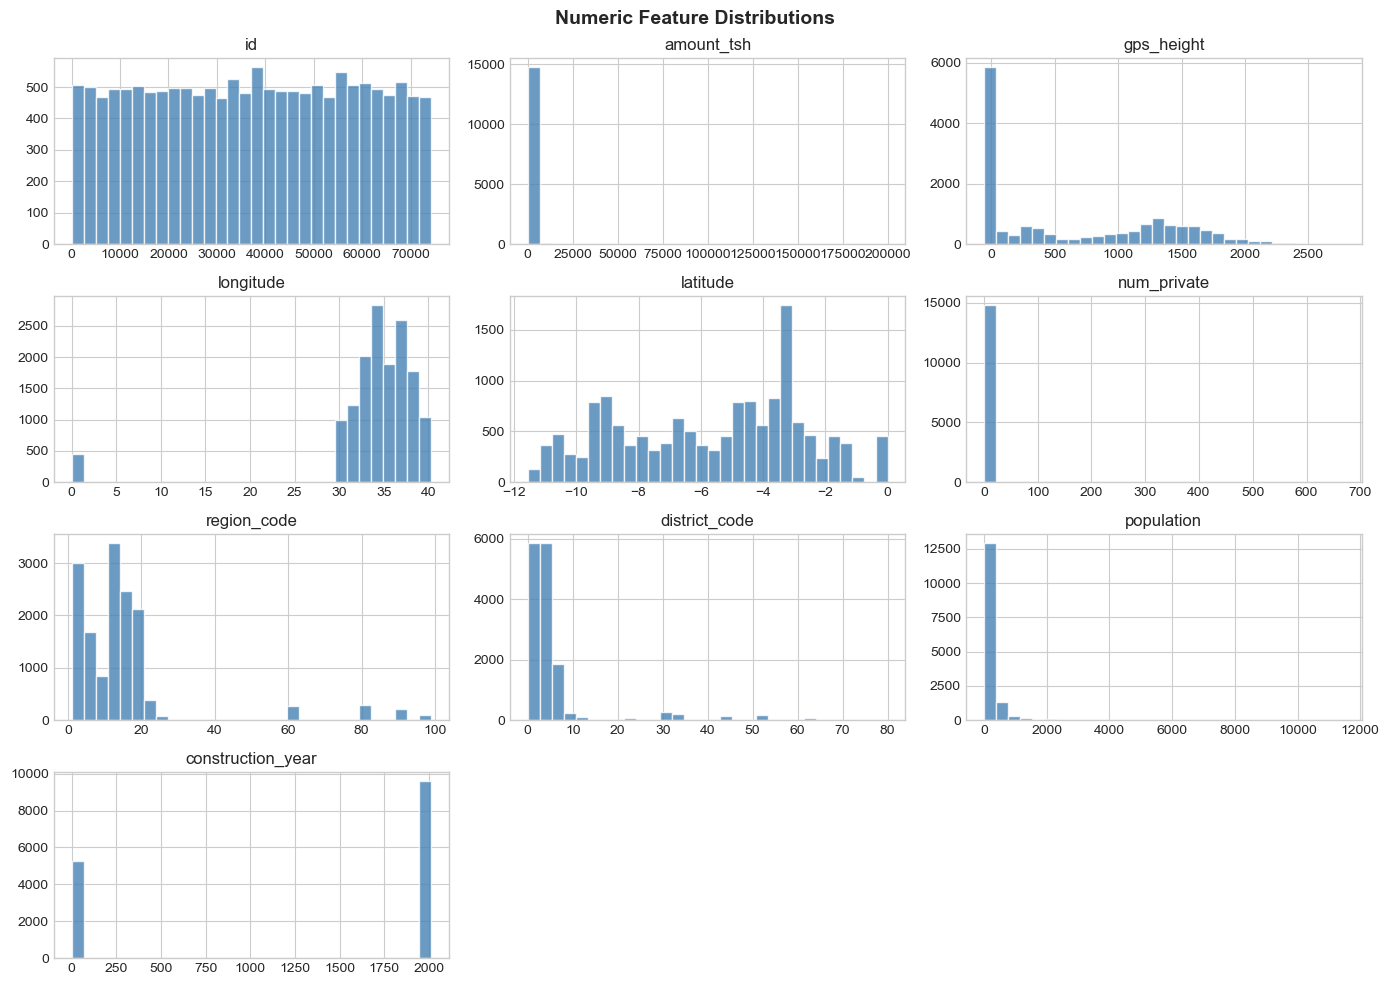

In [766]:
# Histograms for numeric features
test_df.hist(
    figsize = (14, 10), 
    bins = 30, 
    edgecolor = 'white',
    color = 'steelblue',
    alpha = 0.8
)

plt.suptitle('Numeric Feature Distributions', fontsize = 14, fontweight = 'bold')
plt.tight_layout()
plt.show()

Check for outliers

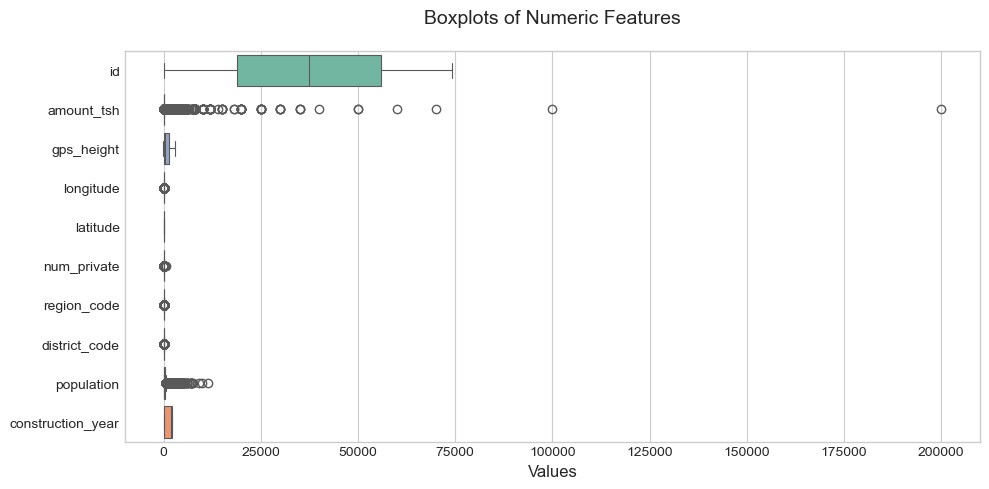

In [767]:
# Save numerical features into a variable
numeric_cols = test_df.select_dtypes(include = np.number).columns

# Plot boxplots
plt.figure(figsize = (10, 5))
sns.boxplot(
    data = test_df[numeric_cols], 
    orient = 'h',
    palette = 'Set2',
    linewidth = 0.8
)

plt.title('Boxplots of Numeric Features', fontsize = 14, pad = 20)
plt.xlabel('Values', fontsize = 12)
plt.tight_layout()
plt.show()

*Observation:* 

The test dataset shows similar quirks to what we saw in training:  
- gps_height still contains negative values, which don’t make physical sense and likely reflect data entry issues.  
- longitude and latitude feature zeros again. Almost certainly placeholders for missing or invalid coordinates.  
- amount_tsh remains heavily skewed, with a bulk of zeros contrasted by very large outliers.  
- num_private is nearly all zeros, with just a handful of anomalous non-zero entries, reinforcing its low utility.  
- construction_year includes zeros, which are unrealistic and should be treated carefully.  
- population carries the same imbalance as in training. Large clusters of zeros alongside extreme highs, pointing to inconsistent reporting.  

In short: the test set mirrors the messiness of the training set, which is a good thing. It means our cleaning strategy can stay consistent.  

Now, let’s move on to exploring the categorical features.  

In [768]:
# Get categorical columns
test_df.select_dtypes(include = 'object').columns.tolist()

['date_recorded',
 'funder',
 'installer',
 'wpt_name',
 'basin',
 'subvillage',
 'region',
 'lga',
 'ward',
 'public_meeting',
 'recorded_by',
 'scheme_management',
 'scheme_name',
 'permit',
 'extraction_type',
 'extraction_type_group',
 'extraction_type_class',
 'management',
 'management_group',
 'payment',
 'payment_type',
 'water_quality',
 'quality_group',
 'quantity',
 'quantity_group',
 'source',
 'source_type',
 'source_class',
 'waterpoint_type',
 'waterpoint_type_group']

In [769]:
# Get descriptive statistics for categorical columns
test_df.describe(include = 'object')

,date_recorded,funder,installer,wpt_name,basin,subvillage,region,lga,ward,public_meeting,...,payment_type,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group
count,14850,13980,13973,14850,14850,14751,14850,14850,14850,14029,...,14850,14850,14850,14850,14850,14850,14850,14850,14850,14850
unique,331,979,1091,10840,9,8443,21,125,1959,2,...,7,8,6,5,5,10,7,3,7,6
top,2013-02-03,Government Of Tanzania,DWE,none,Lake Victoria,Shuleni,Shinyanga,Njombe,Igosi,True,...,never pay,soft,good,enough,enough,shallow well,shallow well,groundwater,communal standpipe,communal standpipe
freq,138,2215,4349,877,2623,140,1311,625,79,12738,...,6364,12687,12687,8336,8336,4316,4316,11492,7106,8614


*Observation:* 

The categorical profile of the test set mirrors the quirks of training:  
- High cardinality persists variables like 'funder', 'installer', and especially 'wpt_name' still carry thousands of unique values, many of which are near-duplicates or inconsistencies.  
- Dominant categories reappear for instance, 'public_meeting' skews heavily toward “True,” and 'payment_type' is once again dominated by “never pay.”  
- Hierarchical geography remains intact features like 'region', 'lga', and 'ward' are consistent, but the overlap suggests potential multicollinearity if all levels are used naively.  
- Overlap and redundancy variables such as 'waterpoint_type' and 'waterpoint_type_group' continue to carry nearly the same information.  
- Suspicious placeholders entries like “none” for 'wpt_name' or vague subvillage names are still common, signaling data quality issues.  

Overall: the categorical landscape in the test set is consistent with training, which is exactly what we want. That means our eventual cleaning strategies can be applied uniformly across both datasets.  

### DATA QUALITY CHECK

Next, we’ll check for data completeness and sanity, i.e. missing values distribution and duplicate records.  

In [770]:
# Check for duplicates
print("Duplicate:", test_df.duplicated().sum())

# Check for missing values and missingness percentage
# Because they are many features, we will only check for missingness above 0%
missing_values = test_df.isnull().sum()
missing_percentage = (missing_values / len(test_df)) * 100
missing_info = pd.DataFrame({'Missing Values': missing_values, 'Percentage': missing_percentage})
print("\nMissing values and percentage:\n", missing_info[missing_info['Percentage'] > 0.000000])

Duplicate: 0

Missing values and percentage:
                    Missing Values  Percentage
funder                        870    5.858586
installer                     877    5.905724
subvillage                     99    0.666667
public_meeting                821    5.528620
scheme_management             969    6.525253
scheme_name                  7242   48.767677
permit                        737    4.962963


*Observation:* 

The test data shows nearly identical missingness patterns to the training set. Proportions are consistent across the board:  
- funder and installer each drop by approximately 6%.  
- public_meeting, scheme_management, and permit fall in the 5–6% range.  
- subvillage barely registers (<1%).  
- scheme_name is the real weak spot again, with approximatelt 49% absent.  

This alignment is encouraging: whatever imputation or feature engineering we apply on the training side can be carried over to the test set without major adjustment.  

## DATA UNDERSTANDING RECAP

### DATA DICTIONARY

The following table provides a comprehensive data dictionary for the Tanzanian waterpoint dataset, as documented by Taarifa and the Tanzanian Ministry of Water. This dataset uses the same schema as the DrivenData *Pump it Up* challenge. Each column is described below.

| Column | Description |
|--------|-------------|
| id | Unique identifier for each waterpoint. |
| amount_tsh | Total static head (amount of water available to waterpoint), in Tanzania Shillings (TSH). Often 0 when unknown. |
| date_recorded | Date the row was entered into the dataset. |
| funder | Organization or individual that funded the waterpoint. |
| gps_height | Altitude of the waterpoint in meters above sea level. |
| installer | Organization or individual who installed the waterpoint. |
| longitude | Geographical coordinate (East). |
| latitude | Geographical coordinate (South). |
| wpt_name | Name of the waterpoint. |
| num_private | Private permit code (rarely used; almost always 0). |
| basin | Geographic water basin of the waterpoint. |
| subvillage | Subvillage where the waterpoint is located. |
| region | Region where the waterpoint is located. |
| region_code | Numeric code for the region. |
| district_code | Numeric code for the district. |
| lga | Name of the local government authority. |
| ward | Ward where the waterpoint is located. |
| population | Estimated population served by the waterpoint. |
| public_meeting | Boolean indicating if a public meeting was held regarding the waterpoint. |
| recorded_by | Name of the data collector (almost always "GeoData Consultants Ltd"). |
| scheme_management | Entity responsible for managing the waterpoint scheme. |
| scheme_name | Name of the water management scheme (often missing). |
| permit | Boolean indicating if the waterpoint has a legal permit. |
| construction_year | Year the waterpoint was constructed. |
| extraction_type | Type of extraction device (e.g gravity, handpump, submersible). |
| extraction_type_group | Grouping of extraction type (e.g hand pump vs. motor pump). |
| extraction_type_class | Broad classification of extraction type (e.g gravity, handpump, motorized). |
| management | Who manages the waterpoint (e.g community, water authority, private). |
| management_group | Grouping of management type (e.g user group vs. authority). |
| payment | How users pay for water (e.g monthly, per bucket, never pay). |
| payment_type | Simplified payment type (e.g free, pay per use, pay monthly). |
| water_quality | Quality of water (e.g soft, salty, milky). |
| quality_group | Grouping of water quality (e.g good, salty, colored). |
| quantity | Quantity of water observed (e.g enough, insufficient, dry). |
| quantity_group | Grouping of water quantity (e.g enough vs. insufficient). |
| source | Source of water (e.g spring, river, machine-drilled borehole). |
| source_type | Broad type of source (e.g surface water, groundwater). |
| source_class | Class of source (e.g groundwater, surface). |
| waterpoint_type | Type of waterpoint (e.g communal standpipe, hand pump, dam). |
| waterpoint_type_group | Grouping of waterpoint type (e.g communal standpipe vs. hand pump). |
| status_group | Target variable: functionality status of the waterpoint:<br>• functional – operational<br>• functional needs repair – operational but needs maintenance<br>• non functional – not working |

### TRAINING DATA OVERVIEW

- **Size**: 59,400 rows × 41 columns  
- **Balance**: Reasonable size for robust EDA; large enough to uncover patterns  
- **Data types**: Mostly categorical (31), some numeric (10), with a clear target (status_group)  
- **Duplicates**: None detected  

#### Data Quality Observations
- **Missing values**:  
  - Heavy: scheme_name (approximately 48%)  
  - Moderate: funder, installer, public_meeting, scheme_management, permit (approximately5–7%)  
  - Minimal: wpt_name, subvillage  
- **Zeros / miscoded values**:  
  - construction_year: many zeros (represents missing, not valid years)  
  - population: some entries are zero or extremely high (likely errors)  
  - gps_height, longitude, latitude; contain zeros/negative values (invalid)  

#### Numeric Features
- **amount_tsh**: Highly skewed; most entries are zero, with few extreme values (up to 350,000)  
- **gps_height**: Range from -90 to 2,770; negative values are unrealistic  
- **population**: Skewed; many villages <500 people, but some values >30,000  
- **construction_year**: Spread from early 1900s to 2013, but many zeros present  

#### Categorical Features
- **funder & installer**: Highly fragmented (1,800–2,000 unique values), but dominated by a few large organizations (e.g Government, World Bank, UNICEF)  
- **region, basin, lga, ward**: Strong geographic detail with multiple levels  
- **waterpoint_type, source, extraction_type**: Rich engineering information, likely tied to functionality  
- **recorded_by**: Only one unique value, not useful for analysis  

#### Target Variable: status_group
- Three categories: *functional*, *non functional*, *functional needs repair*  
- Requires class distribution check to assess balance before deeper analysis  

#### Initial Takeaways
- Data is well-structured overall, but missingness and skew need careful handling  
- Some columns (e.g scheme_name, recorded_by) may not provide analytical value  
- Strong potential in geographic and technical features to explain well functionality  
- Dataset is well-positioned to support decision-making in water resource allocation 

### TESTING DATA OVERVIEW

- **Rows:** 14,850  
- **Columns:** 40  

This dataset mirrors the structure of the training data but without the target label. It is used for evaluation and prediction.

#### Column Types
- **Numerical:** id, amount_tsh, gps_height, longitude, latitude, num_private, region_code, district_code, population, construction_year
- **Categorical:** All other fields such as funder, installer, basin, region, lga, ward, extraction_type, payment_type, source, waterpoint_type, etc.  
- **Datetime-like:** date_recorded

#### Key Statistics (Numerical Columns)
- **id**: 10 – 74,249 (unique identifiers)  
- **amount_tsh**: heavily skewed, most values are **0**, max = 200,000  
- **gps_height**: -57 to 2,777 (some negative/implausible values)  
- **longitude**: 0.0 values present (invalid); normal range 33–40  
- **latitude**: -11.56 to near 0 (Tanzania location, but a few suspicious near-zero values)  
- **population**: many zeros; max = 11,469 (outliers)  
- **construction_year**: many 0s (unknown); valid range up to 2013  

#### Categorical Features (Highlights)
- **funder:** 979 unique values, highly skewed (e.g "Government Of Tanzania" dominant)  
- **installer:** 1,091 unique values (common: "DWE")  
- **wpt_name:** 10,840 unique (very high granularity, limited modeling value)  
- **basin:** 9 categories (e.g Lake Victoria most frequent)  
- **region:** 21 unique values  
- **lga:** 125 unique  
- **ward:** 1,959 unique (very high granularity)  
- **public_meeting:** Boolean, but 5.5% missing  
- **scheme_name:** extremely sparse (48.7% missing)  
- **waterpoint_type:** 7 categories (communal standpipe dominant)  
- **payment_type:** 7 categories (e.g “never pay” most frequent)

#### Duplicates
- **0 duplicates**

#### Missing Values
| Column             | Missing | % Missing |
|--------------------|---------|------------|
| funder             | 870     | 5.86% |
| installer          | 877     | 5.91% |
| subvillage         | 99      | 0.67% |
| public_meeting     | 821     | 5.53% |
| scheme_management  | 969     | 6.53% |
| scheme_name        | 7,242   | 48.77% |
| permit             | 737     | 4.96% |

#### Key Takeaways
- **High missingness** in scheme_name makes it unreliable.  
- **Many zeros** in amount_tsh, population, and construction_year; signals poor data quality.  
- **Location fields** (longitude, latitude, gps_height) contain invalid entries (0s, negatives).  
- **High-cardinality categorical fields** (wpt_name, ward, lga) may not generalize well and will need encoding strategies.  
- Overall structure is consistent with training data, making it suitable for evaluation after preprocessing.

# DATA PREPARATION

Before diving into EDA or modeling, it is crucial to clean, transform, and engineer the dataset to ensure optimal performance of machine learning algorithms and accurate insight generation. The following steps outline a comprehensive data preparation workflow:

* Data Cleaning/Wrangling
* Handling Outliers
* Feature Transformation
* Feature Engineering
* Target Preparation
* Final Dataset Check

Since our focus is currently EDA, we will save the modeling steps for later.

## 1. DATA WRANGLING
- **Drop unnecessary columns:** We will inspect all columns and drop those that have very limited analytical or modelling value. (e.g unique identifiers).
- **Handle missing values**: Decide whether to impute, drop, or treat missing values as a separate category.
- **Correct data types**: Ensure numerical columns are indeed numeric and categorical columns are of type category, object or string. This has already been verified.
- **Remove duplicates**: Both datasets contain 0 duplicated values.

We will do this cleaning excercise on the training data in tandem with the test data.

Let's begin.

### 1. COLUMN BY COLUMN INSPECTION

#### UNIQUE IDENTIFIERS

In [797]:
# Inspect identifier-like columns
id_count = train_df['id'].nunique()
rec_by_count = train_df['recorded_by'].nunique()
rec_by_unique = train_df['recorded_by'].unique()

print(f"Unique IDs: {id_count}")
print(f"Unique 'recorded_by' values: {rec_by_count}")
print("Data recorded by:", rec_by_unique)

Unique IDs: 59400
Unique 'recorded_by' values: 1
Data recorded by: ['GeoData Consultants Ltd']


*Observation:* 

id: Each of the 59,400 records has a unique identifier. This confirms it’s purely an indexing column with no predictive value.

recorded_by: Only one unique value, “GeoData Consultants Ltd”. This feature has zero variance and therefore no informational or predictive power.

*Conclusion:* Both id and recorded_by can be safely dropped from the dataset.

In [798]:
# Drop 'id' and 'recorded_by' columns
train_df.drop(columns = ['id', 'recorded_by'], inplace = True)
test_df.drop(columns = ['id', 'recorded_by'], inplace = True)

In [802]:
# Inspect 'num_private' column
private_by_count = train_df['num_private'].nunique()
private_by_unique = train_df['num_private'].unique()

print(f"Unique 'num_private' values: {private_by_count}")
print("Data with 'num_private' values:\n", private_by_unique)

Unique 'num_private' values: 65
Data with 'num_private' values:
 [   0   39    5   45    6    3  698   32   15    7   25  102    1   93
   14   34  120   17  213   47    8   41   80  141   20   35  131    4
   22   11   87   61   65  136    2  180   38   62    9   16   23   42
   24   12  668  672   58  150  280  160   50 1776   30   27   10   94
   26  450  240  755   60  111  300   55 1402]


*Observation:*
* num_private has 65 unique values, ranging from 0 up to 1776.

* The vast majority of entries are 0, suggesting this column is either: rarely used, inconsistently recorded, or irrelevant in this context.

* Non-zero values appear sporadic and don’t follow a clear distribution or obvious meaning (e.g values like 698, 755, 1776).

* The documentation for this dataset notes that num_private is essentially non-informative. We will drop it because it doesn’t add predictive power.

*Conclusion:* Despite its numeric look, num_private behaves like a noisy, poorly-documented feature. At first glance, it can be dropped without loss of useful information.

In [803]:
# Drop 'num_private' column
train_df.drop(columns = ['num_private'], inplace = True)
test_df.drop(columns = ['num_private'], inplace = True)

### GEOSPATIAL FEATURES
#### 1. HIERARCHICAL ADMINISTRATIVE FEATURES: region, region_code, district_code, lga, ward, subvillage

region and region_code

In [821]:
# Inspect 'region' and 'region_code' columns
print(f"Unique 'region' values: {train_df['region'].nunique()}")
print(f"Region values: \n{(train_df['region'].unique())}\n")

print(f"Unique 'region_code' values: {train_df['region_code'].nunique()}")
print(f"Region code values: \n{(train_df['region_code'].unique())}")

Unique 'region' values: 21
Region values: 
['Iringa' 'Mara' 'Manyara' 'Mtwara' 'Kagera' 'Tanga' 'Shinyanga' 'Tabora'
 'Pwani' 'Ruvuma' 'Kilimanjaro' 'Rukwa' 'Mwanza' 'Kigoma' 'Lindi' 'Dodoma'
 'Arusha' 'Mbeya' 'Singida' 'Morogoro' 'Dar es Salaam']

Unique 'region_code' values: 27
Region code values: 
[11 20 21 90 18  4 17 14 60 10  3 15 19 16 80  1  6  2 12 13  5  7 99 24
  9  8 40]


In [ ]:
# Cross-check mapping between region and region_code
region_map = train_df[['region', 'region_code']].drop_duplicates().sort_values(by = 'region')

print("Region - Region Code Mapping")
print(region_map.to_string(index = False))
print(f"\nTotal regions: {region_map['region'].nunique()}")
print(f"Total region codes: {region_map['region_code'].nunique()}")

🔹 Region ↔ Region Code Mapping
       region  region_code
       Arusha           24
       Arusha            2
Dar es Salaam            7
       Dodoma            1
       Iringa           11
       Kagera           18
       Kigoma           16
  Kilimanjaro            3
        Lindi            8
        Lindi           80
        Lindi           18
      Manyara           21
         Mara           20
        Mbeya           12
     Morogoro            5
       Mtwara            9
       Mtwara           99
       Mtwara           90
       Mwanza           17
       Mwanza           19
        Pwani           40
        Pwani            6
        Pwani           60
        Rukwa           15
       Ruvuma           10
    Shinyanga           11
    Shinyanga           17
    Shinyanga           14
      Singida           13
       Tabora           14
        Tanga            5
        Tanga            4

Total regions: 21
Total region codes: 27


*Observation:*


In [ ]:
# ISO 3166-2 mapping for Tanzania regions
iso_region_map = {
    'Arusha': 'TZ-01',
    'Dar es Salaam': 'TZ-02',
    'Dodoma': 'TZ-03',
    'Iringa': 'TZ-04',
    'Kagera': 'TZ-05',
    'Kigoma': 'TZ-06',
    'Kilimanjaro': 'TZ-07',
    'Lindi': 'TZ-08',
    'Mara': 'TZ-09',
    'Mbeya': 'TZ-10',
    'Morogoro': 'TZ-11',
    'Mtwara': 'TZ-12',
    'Mwanza': 'TZ-13',
    'Rukwa': 'TZ-14',
    'Ruvuma': 'TZ-15',
    'Shinyanga': 'TZ-16',
    'Singida': 'TZ-17',
    'Tabora': 'TZ-18',
    'Pwani': 'TZ-19',
    'Tanga': 'TZ-20',
    'Manyara': 'TZ-26',
    'Geita': 'TZ-27',
    'Katavi': 'TZ-28',
    'Njombe': 'TZ-29',
    'Simiyu': 'TZ-30',
    'Songwe': 'TZ-31'
}

# Create a clean ISO-aligned code
train_df['region_code'] = train_df['region'].map(iso_region_map)

# Sanity check
train_df[['region', 'region_code']]

,region,region_code
0,Iringa,TZ-04
1,Mara,TZ-09
2,Manyara,TZ-26
3,Mtwara,TZ-12
4,Kagera,TZ-05
...,...,...
59395,Kilimanjaro,TZ-07
59396,Iringa,TZ-04
59397,Mbeya,TZ-10
59398,Dodoma,TZ-03


In [820]:
# Inspect 'district_code' and 'lga'
print(f"Unique 'district_code' values: {train_df['district_code'].nunique()}")
print(f"District code values: \n{(train_df['district_code'].unique())}\n")

print(f"Unique 'lga' values: {train_df['lga'].nunique()}")
print(f"LGA values: \n{(train_df['lga'].unique())}")

Unique 'district_code' values: 20
District code values: 
[ 5  2  4 63  1  8  3  6 43  7 23 33 53 62 60 30 13  0 80 67]

Unique 'lga' values: 125
LGA values: 
['Ludewa' 'Serengeti' 'Simanjiro' 'Nanyumbu' 'Karagwe' 'Mkinga'
 'Shinyanga Rural' 'Kahama' 'Tabora Urban' 'Mkuranga' 'Namtumbo' 'Maswa'
 'Siha' 'Meatu' 'Sumbawanga Rural' 'Njombe' 'Ukerewe' 'Bariadi' 'Same'
 'Kigoma Rural' 'Moshi Rural' 'Lindi Rural' 'Rombo' 'Chamwino' 'Bagamoyo'
 'Mafia' 'Arusha Rural' 'Kyela' 'Kondoa' 'Kilolo' 'Kibondo' 'Makete'
 'Singida Rural' 'Masasi' 'Rungwe' 'Moshi Urban' 'Geita' 'Mbulu'
 'Bukoba Rural' 'Muheza' 'Lushoto' 'Meru' 'Iramba' 'Kilombero' 'Mbarali'
 'Kasulu' 'Bukoba Urban' 'Korogwe' 'Bukombe' 'Morogoro Rural' 'Kishapu'
 'Musoma Rural' 'Sengerema' 'Iringa Rural' 'Muleba' 'Dodoma Urban'
 'Ruangwa' 'Hanang' 'Misenyi' 'Missungwi' 'Songea Rural' 'Tanga' 'Tunduru'
 'Hai' 'Mwanga' 'Chato' 'Biharamulo' 'Ileje' 'Mpwapwa' 'Mvomero' 'Bunda'
 'Kiteto' 'Longido' 'Urambo' 'Mbozi' 'Sikonge' 'Ilala' 'Tarime' 'T

In [822]:
# Inspect 'ward' and 'subvillage'
print(f"Unique 'ward' values: {train_df['ward'].nunique()}")
print(f"Ward values: \n{(train_df['ward'].unique())}\n")

print(f"Unique 'subvillage' values: {train_df['subvillage'].nunique()}")
print(f"Subvillage values: \n{(train_df['subvillage'].unique())}")

Unique 'ward' values: 2092
Ward values: 
['Mundindi' 'Natta' 'Ngorika' ... 'Chinugulu' 'Nyamtinga' 'Kinungu']

Unique 'subvillage' values: 19251
Subvillage values: 
['Mnyusi B' 'Nyamara' 'Majengo' ... 'Itete B' 'Maore Kati' 'Kikatanyemba']


### 2. HANDLING MISSING VALUES

In [771]:
# Check for missing values and missingness percentage
# Because they are many features, we will only check for missingness above 0%
missing_values = train_df.isnull().sum()
missing_percentage = (missing_values / len(train_df)) * 100
missing_info = pd.DataFrame({'Missing Values': missing_values, 'Percentage': missing_percentage})
print("Missing values and percentage:\n", missing_info[missing_info['Percentage'] > 0.000000])

Missing values and percentage:
                    Missing Values  Percentage
funder                       3637    6.122896
installer                    3655    6.153199
wpt_name                        2    0.003367
subvillage                    371    0.624579
public_meeting               3334    5.612795
scheme_management            3878    6.528620
scheme_name                 28810   48.501684
permit                       3056    5.144781


We will start with the easiest one to clean and progress to the more challenging features. 

1. wpt_name - Waterpoint Name

In [772]:
# Check for unique values
print("Number of unique values in 'wpt_name':", train_df['wpt_name'].nunique())
train_df['wpt_name'].unique()

Number of unique values in 'wpt_name': 37399


array(['none', 'Zahanati', 'Kwa Mahundi', ..., 'Kwa Yahona Kuvala',
       'Mshoro', 'Kwa Mzee Lugawa'], shape=(37400,), dtype=object)

> *Observation:* The wpt_name column contains over 37,399 unique values. In addition to true nulls, we also see entries labeled 'none'. It’s unclear whether these represent missing data that was mistakenly recorded as 'none', or if they legitimately indicate waterpoints without a name.

Before deciding how to handle these entries, we will first quantify how many waterpoints lack names. Then, we will cross-reference these entries against other columns to understand any patterns, ensuring we make an informed cleaning decision.

In [773]:
# Count how many are exactly 'none'
none_count = (train_df['wpt_name'] == 'none').sum()
print(f"Number of 'none' entries: {none_count}")

# Get sample rows that contain 'none'
print("\nSample entries with 'none' in 'wpt_name':\n")
train_df.loc[train_df['wpt_name'] == 'none'].sample(7)

Number of 'none' entries: 3563

Sample entries with 'none' in 'wpt_name':



,id,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,...,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group,status_group
33798,2131,2200.0,2011-02-25,Danida,1698,DANID,35.376381,-7.964108,none,0,...,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe,functional
28003,22063,0.0,2011-02-20,Roman,1417,Roman,34.615870,-9.971994,none,0,...,soft,good,enough,enough,spring,spring,groundwater,other,other,non functional
40996,313,0.0,2011-07-27,Hesawa,1259,DWE,33.002931,-2.038474,none,0,...,soft,good,insufficient,insufficient,shallow well,shallow well,groundwater,other,other,functional needs repair
4447,60707,1000.0,2011-02-22,Danida,1875,DWE,35.513492,-8.339764,none,0,...,soft,good,enough,enough,hand dtw,borehole,groundwater,hand pump,hand pump,non functional
32691,39503,0.0,2011-03-05,Shipo,1996,SHIPO,34.772752,-9.402571,none,0,...,soft,good,enough,enough,shallow well,shallow well,groundwater,hand pump,hand pump,non functional
24484,65142,0.0,2011-02-14,Kkkt,1754,KKKT,35.768379,-8.023524,none,0,...,soft,good,enough,enough,machine dbh,borehole,groundwater,hand pump,hand pump,functional
26929,41408,0.0,2011-02-19,Luthe,2347,Commu,34.106175,-9.215357,none,0,...,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe,functional


> *Observation:* The wpt_name column contains over 37,399 unique values. In addition to true nulls, there are entries labeled 'none'. It’s unclear whether 'none' represents missing data mistakenly recorded as a string, or if it legitimately indicates waterpoints without a name.

*Exploration:* 
- We quantified the entries and found **3,563 'none' values**.  
- Sample inspection shows these waterpoints span multiple funders, installers, regions, and functionality statuses (functional, non functional).  
- Some have valid numeric entries in 'amount_tsh' and other columns, while others have default or missing values; suggesting 'none' is **not consistently tied to other missing data**.

*Interpretation:*  
- 'none' likely serves as a placeholder for “no name recorded”.  
- Both true nulls and 'none' entries indicate waterpoints without a recorded name.  
- Dropping them would discard potentially useful data.

*Decision:*  
- Treat **all nulls and 'none' entries as "no name"**.  
- This preserves the feature for analysis while clearly marking waterpoints with missing names.  

**Outcome:**  
- 'wpt_name' remains usable for EDA, allowing us to explore patterns across regions, installers, funders, and other columns.  
- The dataset retains integrity without losing information on unnamed waterpoints.

In [774]:
# Convert 'none' to 'Unknown'
train_df['wpt_name'] = train_df['wpt_name'].replace('none', 'Unknown')

# Fill nulls with 'Unknown'
train_df['wpt_name'] = train_df['wpt_name'].fillna('Unknown')

# Sanity check
print("Null values in 'wpt_name' after cleaning:", train_df['wpt_name'].isna().sum())

Null values in 'wpt_name' after cleaning: 0


Next, we standardize the wpt_name values to ensure consistency:

Remove any leading or trailing whitespace and collapse excessive internal spaces.

This ensures that all waterpoint names (including "no name") are clean, readable, and consistent for analysis.

In [775]:
# Remove leading or trailing white spaces and excessive internal spaces
train_df['wpt_name'] = train_df['wpt_name'].str.strip()
train_df['wpt_name'] = train_df['wpt_name'].str.replace(r'\s+', ' ', regex = True)

wpt_name
Unknown            3568
Shuleni            1748
Zahanati            830
Msikitini           535
Kanisani            323
Bombani             271
Sokoni              260
Ofisini             254
School              208
Shule Ya Msingi     199
Shule               152
Sekondari           146
Muungano            133
Mkombozi            111
Madukani            104
Mbugani              94
Hospital             94
Upendo               93
Kituo Cha Afya       90
Mkuyuni              88
Name: count, dtype: int64


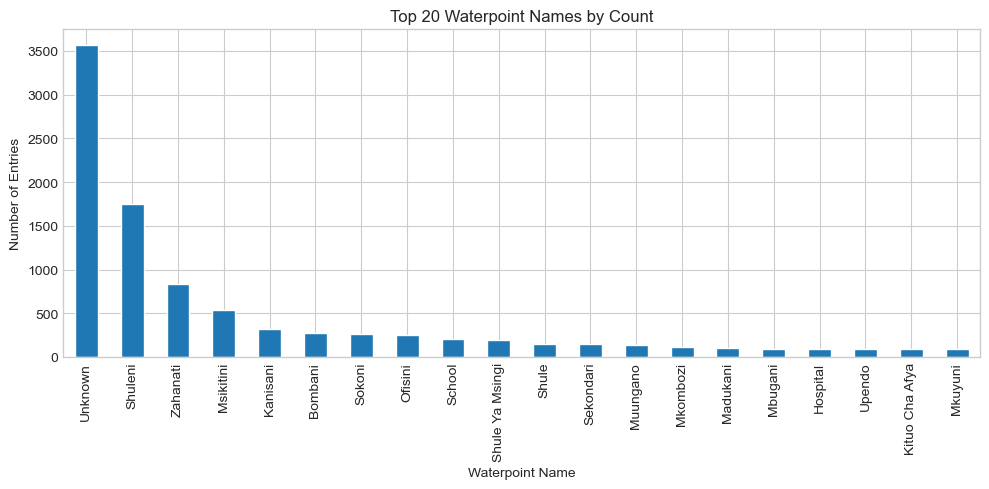

In [776]:
# Count occurrences
wpt_name_counts = train_df['wpt_name'].value_counts(dropna = False)

# Top 20 most common wpt_names
top20 = wpt_name_counts.head(20)
print(top20)

# Plot
plt.figure(figsize = (10,5))
top20.plot(kind = 'bar')
plt.title("Top 20 Waterpoint Names by Count")
plt.ylabel("Number of Entries")
plt.xlabel("Waterpoint Name")
plt.tight_layout()
plt.show()

2. subvillage

In [777]:
# Check for unique values
print("Number of unique values in 'subvillage':", train_df['subvillage'].nunique())
train_df['subvillage'].unique()

Number of unique values in 'subvillage': 19287


array(['Mnyusi B', 'Nyamara', 'Majengo', ..., 'Itete B', 'Maore Kati',
       'Kikatanyemba'], shape=(19288,), dtype=object)

> *Observation:* The subvillage column contains **19,288 unique values**, indicating a **highly granular geographic feature**. The entries range from simple names like 'Nyamara' and 'Majengo' to more complex ones with suffixes such as 'Mnyusi B' and 'Maore Kati'.

*Implications:*

* High cardinality may pose challenges for modeling if used directly as a categorical feature.
* There may be **inconsistencies in spelling, capitalization, or formatting** across entries.
* Some names might contain **leading/trailing spaces or extra internal spacing**, and possibly punctuation differences, which could inflate the apparent number of unique values.

*Next steps:* Standardize names by **trimming spaces and normalizing formatting**.

In [778]:
# Remove leading or trailing white spaces and excessive internal spaces
train_df['subvillage'] = train_df['subvillage'].str.strip()
train_df['subvillage'] = train_df['subvillage'].str.replace(r'\s+', ' ', regex = True)

Next, we will address the missing values. To better understand the data, we will first visualize the distribution of subvillage values, providing a clear overview of the most frequent entries and the overall structure.

Top 20 Subvillages with Water Wells:
 subvillage
Madukani      508
Shuleni       506
Majengo       502
Kati          373
NaN           371
Mtakuja       262
Sokoni        232
M             187
Muungano      172
Mbuyuni       164
Mlimani       152
Songambele    147
Msikitini     134
Miembeni      134
1             132
Kibaoni       114
Kanisani      111
I             109
Mapinduzi     109
Mjimwema      108
Name: count, dtype: int64


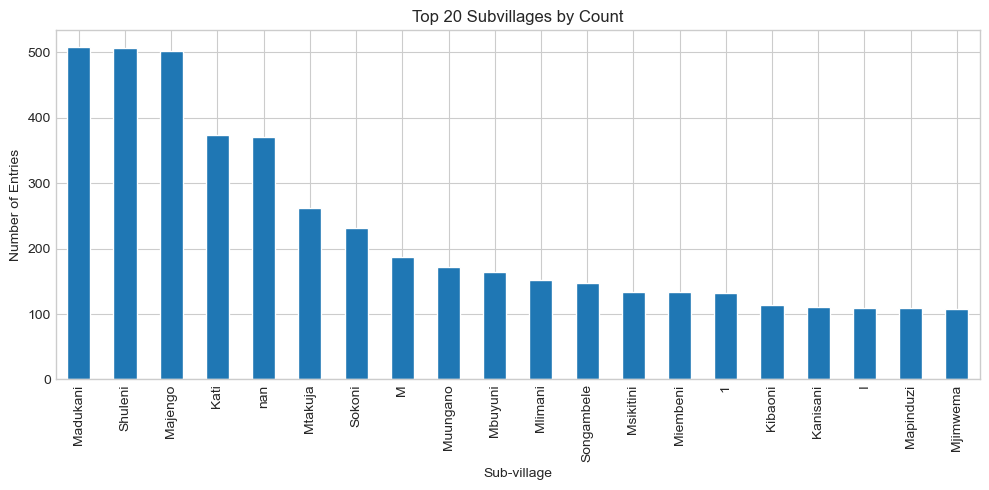

In [779]:
# Count occurrences
subvillage_counts = train_df['subvillage'].value_counts(dropna = False)

# Top 20 most common subvillages
top20 = subvillage_counts.head(20)
print("Top 20 Subvillages with Water Wells:\n", top20)

# Plot
plt.figure(figsize = (10,5))
top20.plot(kind = 'bar')
plt.title("Top 20 Subvillages by Count")
plt.ylabel("Number of Entries")
plt.xlabel("Sub-village")
plt.tight_layout()
plt.show()

> *Observation:* In addition to the 371 missing values, the subvillage column contains invalid entries such as 1 and M. To address this, we will define a cleaning function that removes extraneous whitespace and treats these invalid entries as noise

In [780]:
# Define a cleaning function
def clean_subvillage(x):
    ''' Cleans the subvillage names by:
        - Stripping leading/trailing whitespace
        - Capitalizing each word
        - Treating obvious noise as NaN
    '''

    if pd.isna(x):
        return np.nan
    x = str(x).strip()         
    x = x.title()

    # treat obvious noise as NaN
    if len(x) <= 1 or x.isnumeric():
        return np.nan
    return x

train_df['subvillage'] = train_df['subvillage'].apply(clean_subvillage)

# Sanity check
top20_clean = train_df['subvillage'].value_counts(dropna = False).head(20)
print("Top 20 Subvillages with Water Wells (Cleaned):\n", top20_clean)

Top 20 Subvillages with Water Wells (Cleaned):
 subvillage
NaN           1062
Madukani       508
Shuleni        506
Majengo        502
Kati           373
Mtakuja        262
Sokoni         232
Muungano       172
Mbuyuni        164
Mlimani        152
Songambele     147
Msikitini      134
Miembeni       134
Kibaoni        114
Kanisani       111
Mapinduzi      109
Mjimwema       108
Mjini          108
Mkwajuni       104
Mwenge         102
Name: count, dtype: int64


> *Observation:* After cleaning, the subvillage column still has 1,062 missing values, making it the most common “category” in the dataset. Among the valid entries, Madukani, Shuleni, and Majengo are the most frequently occurring subvillages, each with roughly 500 entries. The distribution then tapers off, with many subvillages appearing less than 200 times. This highlights two important points:
* Missing values are significant (~5% of the dataset), requiring careful imputation.

* High cardinality and long-tail distribution: a small number of subvillages dominate the dataset, while most are sparsely represented, which has implications for both imputation and modeling.

*Imputation Strategy:* To handle the missing subvillage values, we will use a region-wise mode imputation. Specifically, each null entry was replaced with the most frequent subvillage within its respective region. If a region had no clear mode, the entry was set to 'Unknown'.

In [781]:
missing_by_region = train_df[train_df['subvillage'].isna()].groupby('region')['subvillage'].count()
print(missing_by_region)

missing_by_district = train_df[train_df['subvillage'].isna()].groupby('district_code')['subvillage'].count()
print(missing_by_district)

region
Arusha         0
Dodoma         0
Iringa         0
Kilimanjaro    0
Mara           0
Mwanza         0
Rukwa          0
Shinyanga      0
Tabora         0
Name: subvillage, dtype: int64
district_code
1     0
2     0
3     0
4     0
8     0
30    0
Name: subvillage, dtype: int64


In [782]:
# Impute missing subvillage values using region-wise mode imputation
# If a region has no clear mode, fill with 'Unknown'
train_df['subvillage'] = train_df.groupby('region')['subvillage'] \
                                 .transform(lambda x: x.fillna(x.mode()[0] if not x.mode().empty else 'Unknown'))

# Sanity check
print("Missing values after imputation:", train_df['subvillage'].isna().sum())
print("\nSubvillage value counts:")
print(train_df['subvillage'].value_counts(dropna = False).head(7))

Missing values after imputation: 0

Subvillage value counts:
subvillage
Kati        903
Madukani    652
Majengo     528
Shuleni     506
Kawawa      438
Mtakuja     262
Sokoni      232
Name: count, dtype: int64


3. permit

Number of unique values in 'permit': 2

Unique values in 'permit': [False True nan]

Permits Distribution:
 permit
True     38852
False    17492
NaN       3056
Name: count, dtype: int64


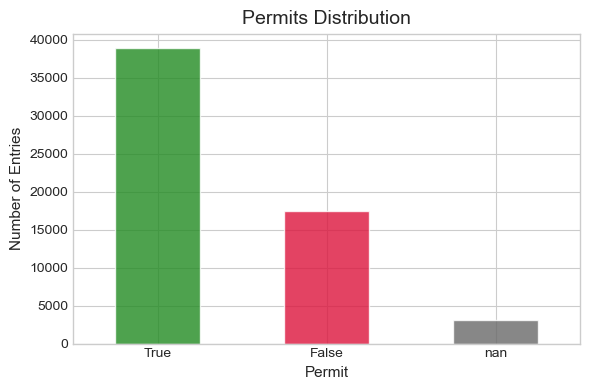

In [783]:
# Check for unique values
print("Number of unique values in 'permit':", train_df['permit'].nunique())
print("\nUnique values in 'permit':", train_df['permit'].unique())

# Count occurrences
permit_counts = train_df['permit'].value_counts(dropna = False)
print("\nPermits Distribution:\n", permit_counts)

# Create clean plot
plt.figure(figsize=(6, 4))

colors = []
for x in permit_counts.index:
    if x == True:
        colors.append('forestgreen')
    elif x == False:
        colors.append('crimson')
    else:  
        colors.append('dimgray')
        
ax = permit_counts.plot(kind = 'bar', color = colors, alpha = 0.8, edgecolor = 'white')

# Labels and title
plt.title("Permits Distribution", fontsize = 14, pad = 7)
plt.ylabel("Number of Entries", fontsize = 11)
plt.xlabel("Permit", fontsize = 11)
ax.set_xticklabels(permit_counts.index, rotation = 0, ha = 'center')
plt.tight_layout()
plt.show()

> *Observation:* The permit column is a categorical boolean feature with three distinct values: True, False, and NaN. Out of 59,400 total entries:

* True (has permit): 38,852 (approximately 65%)

* False (no permit): 17,492 (approximately 29%)

* Missing (NaN): 3,056 (approximately 5%)

In [784]:
train_df['permit'] = train_df['permit'].fillna('Unknown')

# Sanity check
print("Null values in 'permit' after cleaning:", train_df['permit'].isna().sum())

Null values in 'permit' after cleaning: 0


4. public meeting

Number of unique values in 'public_meeting': 2

Unique values in 'public_meeting': [True nan False]

Public Meeting Distribution:
 public_meeting
True     51011
False     5055
NaN       3334
Name: count, dtype: int64


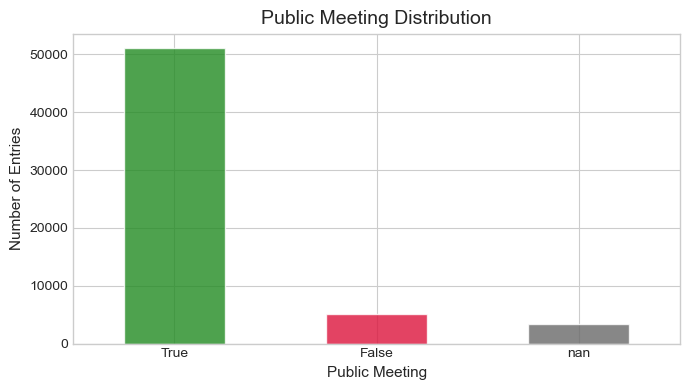

In [785]:
# Check for unique values
print("Number of unique values in 'public_meeting':", train_df['public_meeting'].nunique())
print("\nUnique values in 'public_meeting':", train_df['public_meeting'].unique())

# Count occurrences
public_meeting_counts = train_df['public_meeting'].value_counts(dropna = False)
print("\nPublic Meeting Distribution:\n", public_meeting_counts)

# Plot
plt.figure(figsize=(7, 4))

colors = []
for x in public_meeting_counts.index:
    if x == True:
        colors.append('forestgreen')
    elif x == False:
        colors.append('crimson')
    else:  
        colors.append('dimgray')

ax = public_meeting_counts.plot(kind = 'bar', color = colors, alpha = 0.8, edgecolor = 'white')

# Labels and title
plt.title("Public Meeting Distribution", fontsize = 14, pad = 7)
plt.ylabel("Number of Entries", fontsize = 11)
plt.xlabel("Public Meeting", fontsize = 11)
ax.set_xticklabels(public_meeting_counts.index, rotation = 0, ha = 'center')
plt.tight_layout()
plt.show()

> *Observation:* The public_meeting variable is largely dominated by True (approximately 87%), with a much smaller share of False (approximately 9%). About 5–6% (3,334 records) are missing, which is non-trivial. The missing values may not be random. Given that public meetings are often tied to local governance structures, the absence of records could reflect regional reporting gaps or data collection inconsistencies, rather than genuine absence of meetings. This warrants further investigation before imputation.

To address this, we impute the nulls with a placeholder value; "Unknown"

In [786]:
train_df['public_meeting'] = train_df['public_meeting'].fillna('Unknown')

# Sanity check
print("Null values in 'public_meeting' after cleaning:", train_df['public_meeting'].isna().sum())

Null values in 'public_meeting' after cleaning: 0


5. funder

In [787]:
# Check for unique values
print("Number of unique values in 'funder':", train_df['funder'].nunique())
print("\nUnique values in 'funder':", train_df['funder'].unique())

# Count occurrences
funder_counts = train_df['funder'].value_counts(dropna = False)
print("\nFunder Distribution:\n", funder_counts)

Number of unique values in 'funder': 1896

Unique values in 'funder': ['Roman' 'Grumeti' 'Lottery Club' ... 'Dina' 'Brown' 'Samlo']

Funder Distribution:
 funder
Government Of Tanzania    9084
NaN                       3637
Danida                    3114
Hesawa                    2202
Rwssp                     1374
                          ... 
Cida                         1
Dwe/anglican Church          1
Dina                         1
Brown                        1
Private Institutions         1
Name: count, Length: 1897, dtype: int64


funder
Government Of Tanzania    9084
NaN                       3637
Danida                    3114
Hesawa                    2202
Rwssp                     1374
World Bank                1349
Kkkt                      1287
World Vision              1246
Unicef                    1057
Tasaf                      877
District Council           843
Dhv                        829
Private Individual         826
Dwsp                       811
0                          777
Norad                      765
Germany Republi            610
Tcrs                       602
Ministry Of Water          590
Water                      583
Name: count, dtype: int64


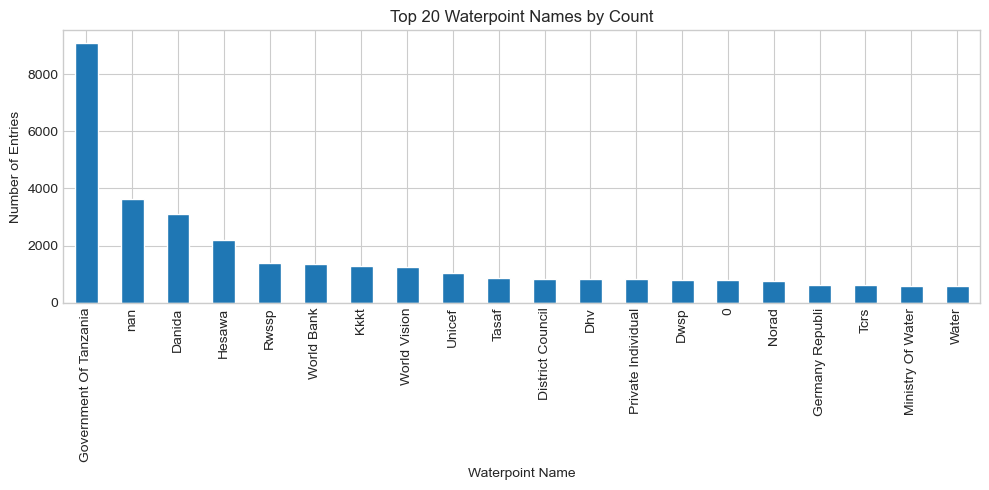

In [788]:
# Remove leading or trailing white spaces and excessive internal spaces
train_df['funder'] = train_df['funder'].str.strip()
train_df['funder'] = train_df['funder'].str.replace(r'\s+', ' ', regex = True)

# Count occurrences
funder_counts = train_df['funder'].value_counts(dropna = False)

# Top 20 most common funders
top20 = funder_counts.head(20)
print(top20)

# Plot
plt.figure(figsize = (10,5))
top20.plot(kind = 'bar')
plt.title("Top 20 Waterpoint Names by Count")
plt.ylabel("Number of Entries")
plt.xlabel("Waterpoint Name")
plt.tight_layout()
plt.show()

In [791]:
# Define a cleaning function
def clean_funder(x):
    ''' Cleans the funder names by:
        - Stripping leading/trailing whitespace
        - Capitalizing each word
        - Treating obvious noise as NaN
    '''

    if pd.isna(x):
        return np.nan
    x = str(x).strip()         
    x = x.title()

    # treat obvious noise as NaN
    if len(x) <= 1 or x.isnumeric():
        return np.nan
    return x

train_df['funder'] = train_df['funder'].apply(clean_funder)

# Sanity check
top20_clean = train_df['funder'].value_counts(dropna = False).head(25)
print("Top 30 Funders with Water Wells (Cleaned):\n", top20_clean)

Top 30 Funders with Water Wells (Cleaned):
 funder
Government Of Tanzania    9084
NaN                       4582
Danida                    3114
Hesawa                    2202
Rwssp                     1374
World Bank                1349
Kkkt                      1287
World Vision              1246
Unicef                    1057
Tasaf                      877
District Council           843
Dhv                        829
Private Individual         826
Dwsp                       811
Norad                      765
Germany Republi            610
Tcrs                       602
Ministry Of Water          590
Water                      583
Dwe                        484
Netherlands                470
Hifab                      450
Adb                        448
Lga                        442
Amref                      425
Name: count, dtype: int64


## 2. HANDLING OUTLIERS
- **Numerical outliers**: Detect extreme values in columns such as amount_tsh, gps_height, or population and decide whether to cap, transform, or remove them.
- **Categorical anomalies**: Standardize inconsistent entries in categorical columns (e.g payment_type, water_quality) to unify spelling or capitalization.